# Лабораторная работа №1. Регрессия

**Тема:** *Сравнение линейной регрессии, случайного леса (Random Forest Regressor), градиентного бустинга (XGBoost) на задаче регрессии.*

**Цели:**

- *Научиться строить, оптимизировать и оценивать регрессионные модели.*
- *Понять, как интерпретировать важность признаков (feature importance).*
- *Понять, как увеличивать кол-во признаков (feature tuning).*
- *Исследовать влияние преобразований признаков (фичей), регуляризации и гиперпараметров.*

**Условия:**

- *numpy, pandas, scikit-learn, XGBoost*
- *выбрать датасет для 1-ой и 2-ой лабораторной работы*

**Пункты:**

1. Подготовка данных + Feature Tuning
2. Создание метрик
3. Базовая модель линейной регрессии
4. Улучшение линейной регрессии
5. Случайный лес регрессор
6. Градиентный бустинг (XGBoost)
7. Feature Importance
8. Написание своих реализаций (классы)
9. Подведение итогов


## О команде

| Фамилия И.О.        | Группа | Роль в команде | Что делал                    |
|---------------------|--------|----------------|------------------------------|
| Кривошапкин Е.Б.         | 309    | teamlead, techlead, frontend dev, sigmaboi, backend dev, ML engineer      | Все сам                      |

 Датасет: [diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?utm_source=chatgpt.com)

## Описание датасета (Pima Indians Diabetes Database)

Этот набор данных изначально предоставлен Национальным институтом диабета, заболеваний органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия у пациента диабета на основе определённых диагностических показателей, включённых в набор. При отборе этих случаев из более обширной базы данных был наложен ряд ограничений. В частности, все пациенты — женщины не моложе 21 года, принадлежащие к индейскому племени пима.

Наборы данных состоят из нескольких медицинских прогностических переменных и одной целевой переменной, `Outcome`. Переменные для прогноза включают количество беременностей пациентки, её ИМТ, уровень инсулина, возраст и т. д.

---

### Таблица признаков

| №  | Признак                  | Тип данных     | Описание                                                                               |
| -- | ------------------------ | -------------- | -------------------------------------------------------------------------------------- |
| 1  | **Pregnancies**        | integer          | Количество беременностей |
| 2  | **Glucose**     | integer          | Концентрация глюкозы в плазме через 2 часа при пероральном тесте на толерантность к глюкозе     |
| 3  | **BloodPressure**          | integer          | Диастолическое артериальное давление (мм рт. ст.)                           |
| 4  | **SkinThickness**       | integer          | Толщина кожной складки трицепса (мм)                       |
| 5  | **Insulin**            | integer          | 2-часовой уровень сывороточного инсулина (мкЕд/мл)            |
| 6  | **BMI**  | float          | Индекс массы тела (вес в кг/(рост в м)^2)               |
| 7  | **DiabetesPedigreeFunction** | float          | Функция родословной диабета         |
| 8  | **Age**              | integer          | Возраст (лет)                    |
| 9  | **Outcome** (target)                   | integer (0-1)          | Переменная класса (0 или 1) 268 из 768 равны 1, остальные равны 0 (целевой признак)                        |


## 0. Глобальная настройка проекта


In [65]:
RND_SEED = 21
USE_AUTO_POLY = True

## 1. Подготовка данных + Feature Tuning

### 1.1. Загрузка датасета

Подключим `Google Drive` и загрузим наш датасет используя `Pandas.DataFrame`

Подключение к гугл диску

In [66]:
import pandas as pd
import numpy as np
from pathlib import Path

data_path = Path(r"./diabetes.csv")

Загрузка датасета `pd.read_csv(path_to_dataset: str)`

In [67]:
df = pd.read_csv(data_path)

Получение статистки по датасету, необходимую для анализа. Подумать что можно сделать и какие выводы нужны.

Посмотрим первые три строки датасета `df.head(n: int)`

In [68]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### 1.2. Сбор основной информации

Получение общей информации `df.info()`

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Получение всей статистики `df.describe()`

In [70]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Вывод:**

1. Общая информация

    - **Размер датасета**: 768 наблюдений (пациентов).
    - **Целевая переменная (Outcome)**: принимает значения **0 (нет диабета)** и **1 (есть диабет)**.
        - Без диабета: **500 человек**  
        - С диабетом: **268 человек**  
        - Доля больных ≈ **35%**

    -> Наблюдается дисбаланс классов (здоровых почти в 2 раза больше).

2. Основные показатели здоровья

    - **Pregnancies** (беременности):  
      В среднем около 4, максимум 17. Чаще встречаются значения от 1 до 6.

    - **Glucose** (уровень сахара в крови):  
      Среднее значение ≈ 121. Есть подозрительные нули (такого быть не может).  
      При диабете обычно больше 140.

    - **BloodPressure** (давление):  
      Среднее ≈ 69. Иногда встречаются нули, что похоже на ошибки.  

    - **SkinThickness** (толщина кожной складки):  
      В среднем около 20 мм, но много нулей (скорее всего данные не измерялись).  
      Есть значения до 99 мм, что выглядит странно.

    - **Insulin**:  
      Среднее ≈ 80, но медиана всего 30 → распределение с сильными выбросами.  
      Много нулей, что тоже указывает на пропуски.  

    - **BMI** (индекс массы тела):  
      Среднее ≈ 32, то есть много людей с лишним весом.  
      Минимум равен 0 (такого быть не может).  

    - **DiabetesPedigreeFunction** (наследственный риск):  
      Обычно меньше 1, но максимум 2.4.  

    - **Age**:  
      В среднем около 33 лет. В выборке больше молодых женщин, чем пожилых. 


Проверка на пропуски данных `df.isnull().sum()`

In [71]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Вывод:** в датасете нет пропусков!

Посмотрим на распределение целевой переменной

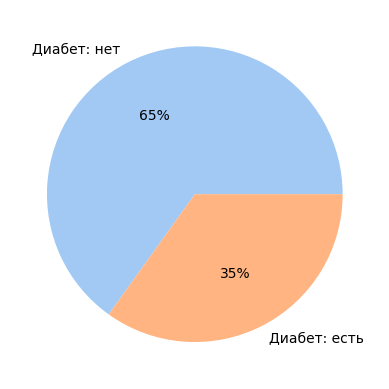

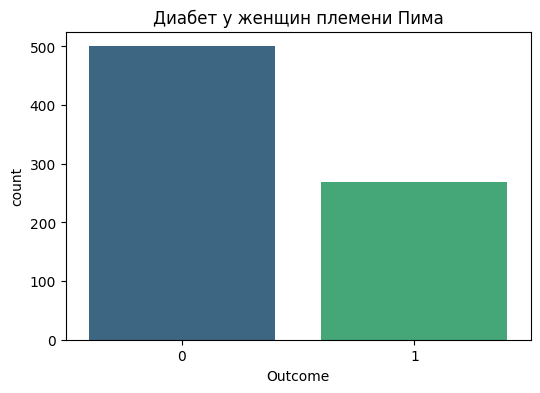

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

def draw_pie_plot(df: pd.DataFrame, column_name: str):
    explore_column = df[column_name]
    explore_column_normal = list(zip(
        [f'Диабет: {"есть" if q == 1 else "нет"}' for q in explore_column.value_counts().index],
        explore_column.value_counts(normalize=True)
    ))

    label, params = zip(*explore_column_normal)

    colors = sns.color_palette('pastel')[0:len(params)]
    plt.pie(params, labels=label, colors=colors, autopct='%.0f%%')
    plt.show()

def draw_bar_plot(df: pd.DataFrame, column_name: str, title: str):
    plt.figure(figsize=(6,4))
    sns.countplot(x=column_name, data=df, hue="Outcome", palette="viridis", legend=False)
    plt.title(title)
    plt.show()


draw_pie_plot(df, 'Outcome')
draw_bar_plot(df, 'Outcome', title = "Диабет у женщин племени Пима")

**Вывод:** целевая переменная несбалансирована

Посмотрим на корреляцию данных.

***Определение 1: Корреляция данных — это статистическая мера, показывающая, насколько и в каком направлении связаны между собой две переменные.***

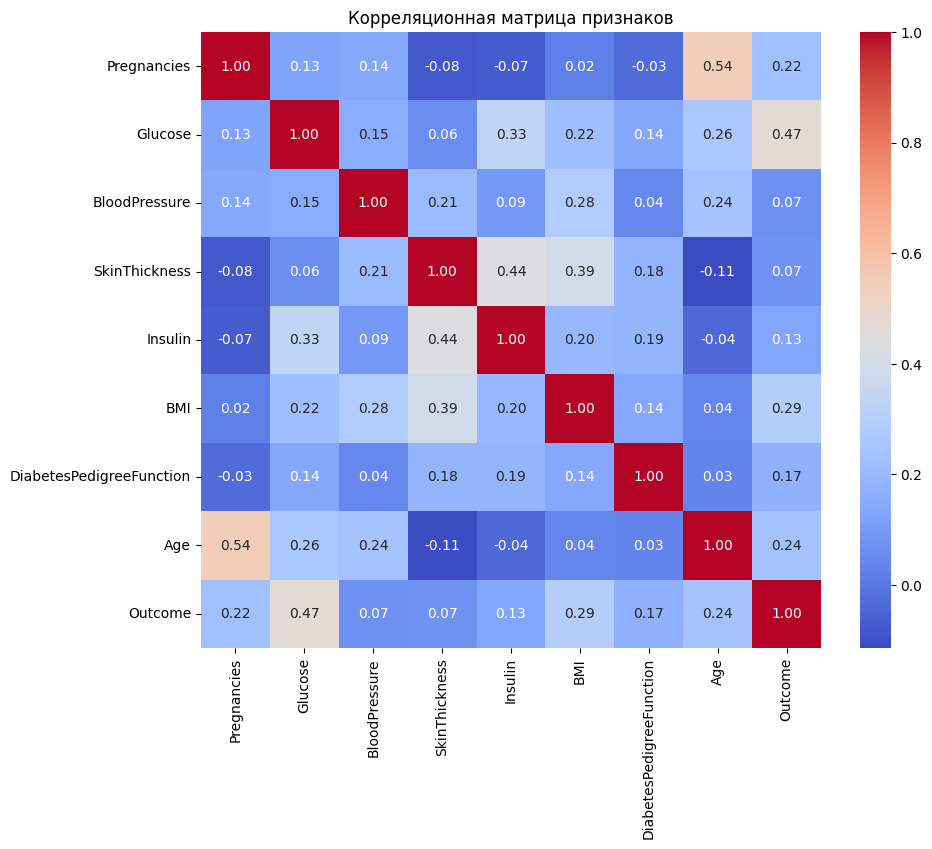

In [73]:
def draw_corr_matrix(df):
    plt.figure(figsize=(10,8))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Корреляционная матрица признаков")
    plt.show()

draw_corr_matrix(df)

**!!! ВАЖНО !!!**

**ЕСЛИ МЫ СОБИРАЕМСЯ УЧИТЬ ЛИНЕЙНУЮ МОДЕЛЬ, И ДАННЫЕ КОРРЕЛИРУЮТ (МУЛЬТИКОЛЛИНЕАРНОСТЬ), ТО НУЖНО ЛИБО УДАЛИТЬ ОДИН ИЗ ПРИЗНАКОВ, ЛИБО СОЗДАТЬ НОВЫЙ ПРИЗНАК НА ИХ ОСНОВЕ И ИХ УДАЛИТЬ**

### 1.3. Подготовка датасета под разные задачи

Cравнение подготовки

| Модель                  | Масштабирование | Корреляция критична | Выбросы критичны | Feature Engineering рекомендуем                  |
| ----------------------- | --------------- | ------------------- | ---------------- | ------------------------------------------------ |
| Линейная регрессия      | Да              | Да                  | Да               | Полиномы, логарифмы, отношения                   |
| Random Forest Regressor | Нет             | Нет                 | Нет              | Соотношения, интеракции                          |
| XGBoost Regressor       | Нет             | Нет                 | Нет              | Соотношения, интеракции, логарифмы (опционально) |

#### 1.3.1 Линейная регрессия (Linear Regression / Ridge / Lasso)

**Особенности модели:**

- Чувствительна к масштабу признаков и мультиколлинеарности.
- Чувствительна к выбросам.

Сделаем копию датасета

In [74]:
df_linear = df.copy()

Рассмотрим скошенность данных

***Определение 2: Скошенность – это мера асимметрии распределения признака***

* **Скошенность > 0 (положительная):** Хвост распределения тянется вправо (большие значения встречаются реже).

* **Скошенность < 0 (отрицательная):** Хвост распределения тянется влево (малые значения редки).

* **Скошенность ≈ 0:** Практически нормальное распределение (симметричное).


In [75]:
skew_values = df_linear.skew()
skew_values_hard = skew_values[abs(skew_values) > 0.5]  # выделяем сильноскошенные данные
print(skew_values_hard)  # сильно скошенные

skew_columns_hard = list(skew_values_hard.index)
print(f'Скошенные столбцы {skew_columns_hard}')

Pregnancies                 0.901674
BloodPressure              -1.843608
Insulin                     2.272251
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64
Скошенные столбцы ['Pregnancies', 'BloodPressure', 'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


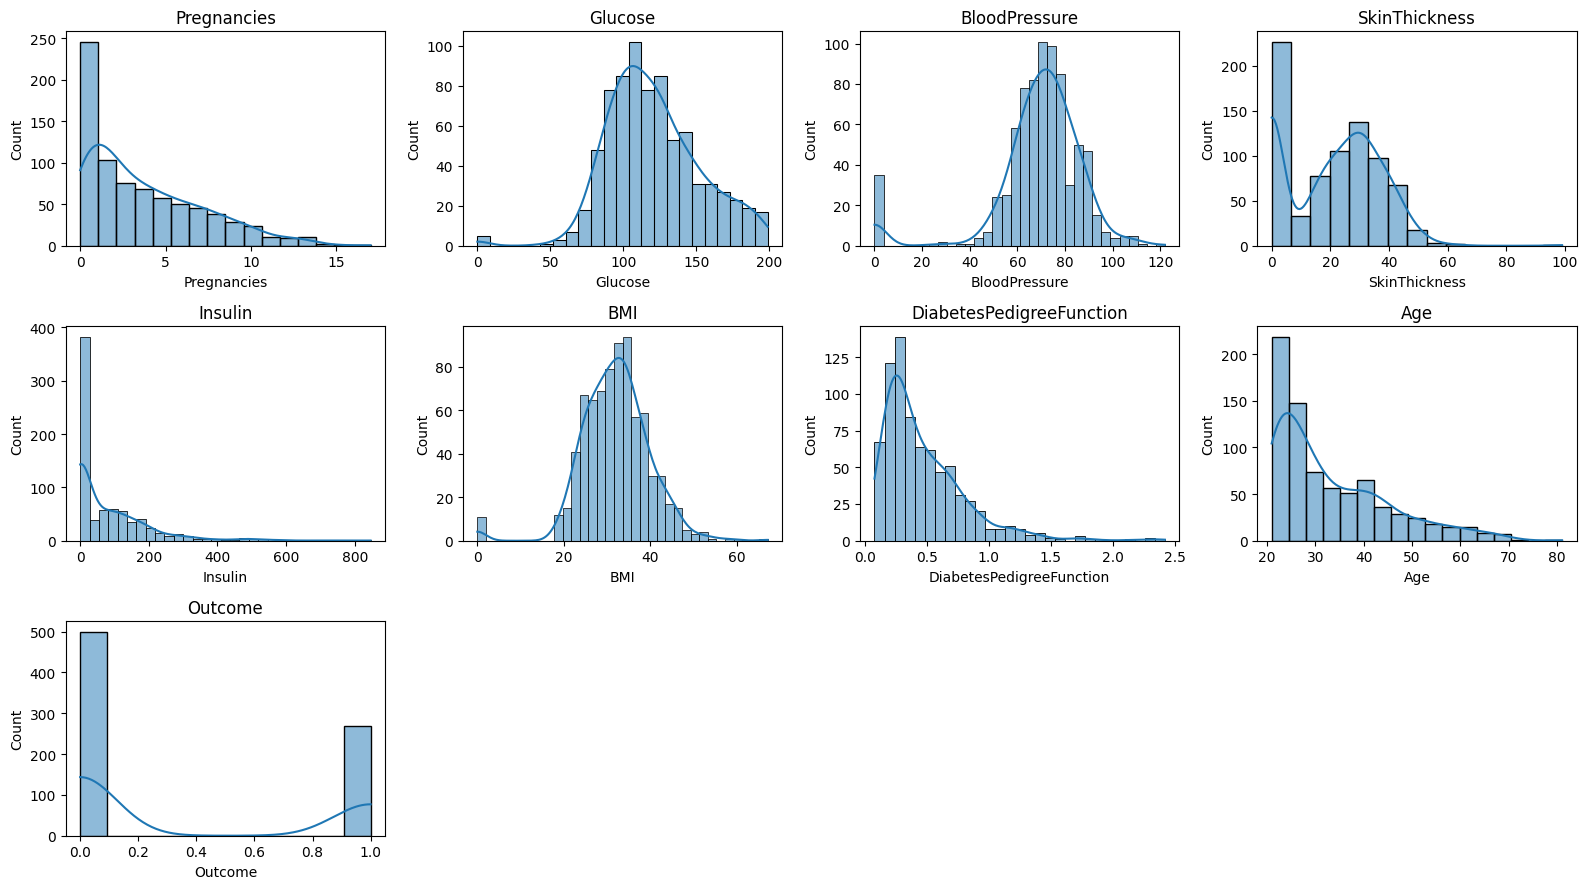

In [76]:
import math

def draw_skew(df: pd.DataFrame, n_cols=4):
    float_cols = df.select_dtypes(include=['int', 'float']).columns
    n_rows = math.ceil(len(float_cols) / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))
    axs = axs.flatten()  # делаем одномерным массивом для удобства

    for i, col in enumerate(float_cols):
        sns.histplot(df[col], kde=True, ax=axs[i])
        axs[i].set_title(f'{col}')

    # Если графиков меньше, чем ячеек в сетке, скрываем лишние
    for j in range(i+1, len(axs)):
        axs[j].set_visible(False)

    plt.tight_layout()
    plt.show()


draw_skew(df_linear)

Можно уменьшить влияние скошенности с помошью:

- Логарифмирование (Уменьшаем положительный хвост)
- Квадратный корень  (сглаживаем умеренные хвосты)
- `Box-Cox` или `Yeo-Johnson` трансформации (более гибкие)

Мы же просто прологарифмируем :)

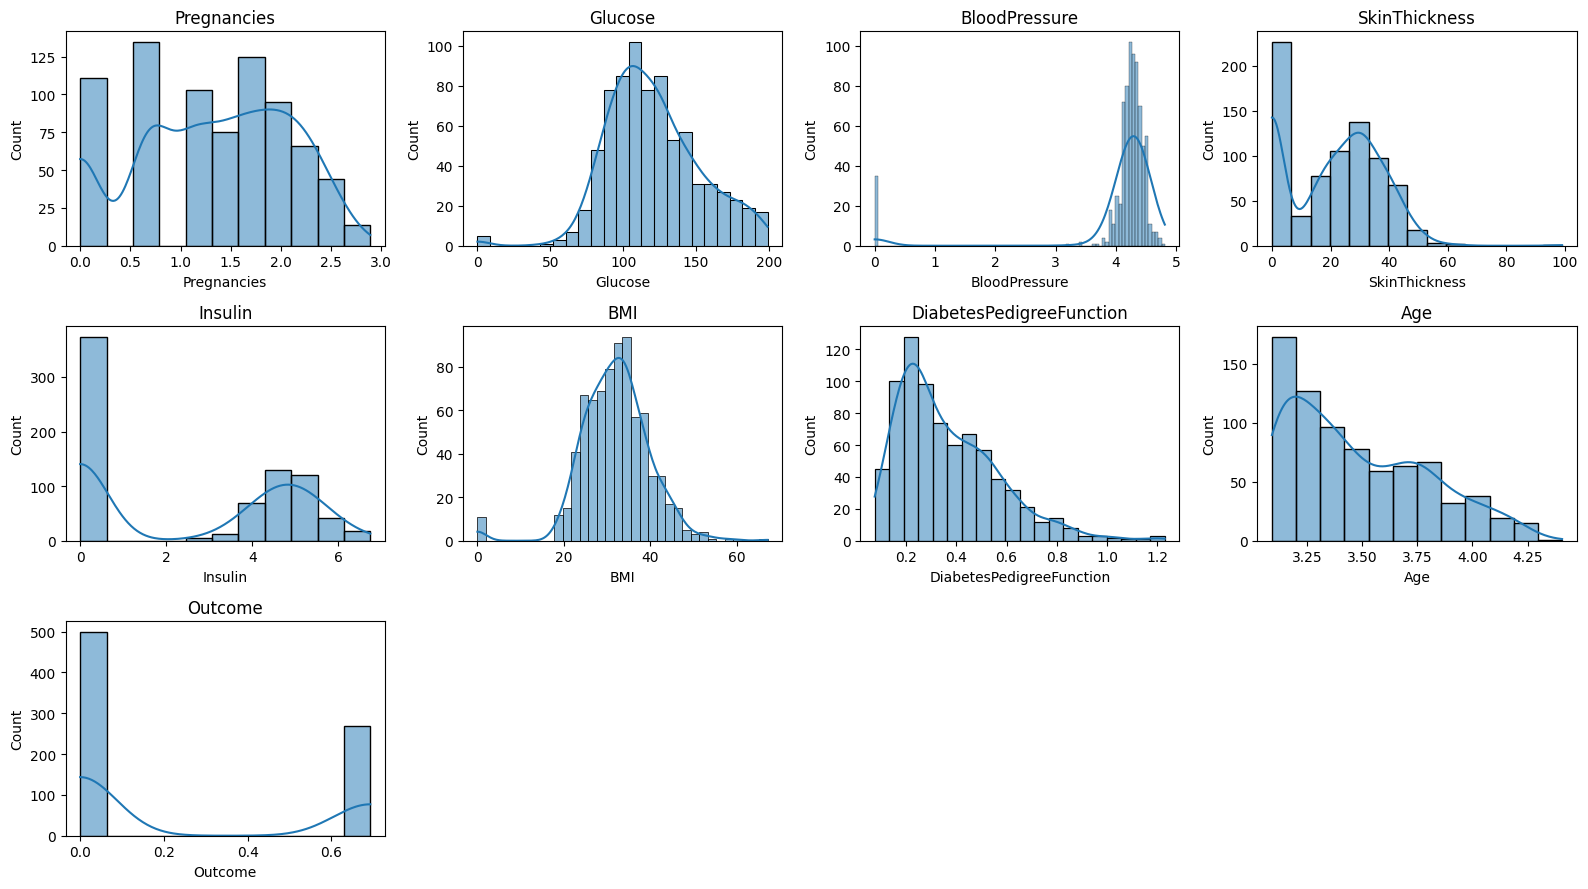

In [77]:
def prepare_skew(df: pd.DataFrame, columns: list[str]):
    for col in columns:
        df[col] = np.log1p(df[col])
    return df

df_linear = prepare_skew(df = df_linear, columns = skew_columns_hard)

draw_skew(df_linear)

Сделаем `Feature Engineering` (4 штуки)

Определение 3. Feature Engineering - процесс добавления новых зависимостей признаков.

   * `alcohol_squared` — нелинейное влияние алкоголя на качество.
   * `fixed_citric` — взаимодействие кислот.
   * `free_total_sulfur_ratio` — эффективность защиты SO₂.



In [78]:
# Полиномиальные признаки
if not USE_AUTO_POLY:
    # ручками
    df_linear['glucose_squared'] = df_linear['Glucose'] ** 2
    df_linear['bmi_sqrt'] = df_linear['BMI'] ** 0.5

    # Интерактивные признаки
    df_linear['glucose_bmi'] = df_linear['Glucose'] * df_linear['BMI']

    # Отношения
    df_linear['glucose_age_ratio'] = df_linear['Glucose'] / (df_linear['Age'] + 1e-6)

else:
    from sklearn.preprocessing import PolynomialFeatures

    # Выбираем только числовые признаки для полиномиальных преобразований
    num_features = [
        'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
    ]

    X_num = df_linear[num_features]

    # Создаём генератор полиномиальных признаков (degree=2)
    poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

    X_poly = poly.fit_transform(X_num)

    # Получаем имена новых признаков
    feature_names = poly.get_feature_names_out(num_features)

    # Превращаем обратно в DataFrame
    df_poly = pd.DataFrame(X_poly, columns=feature_names, index=df_linear.index)

    # Объединяем с исходным DataFrame (если нужно оставить остальные признаки)
    df_linear = pd.concat([df_linear, df_poly], axis=1)


In [79]:
if not USE_AUTO_POLY:
    draw_corr_matrix(df_linear)
else:
    print(df_linear.corr())

                                        Pregnancies   Glucose  BloodPressure  \
Pregnancies                                1.000000  0.106797       0.065780   
Glucose                                    0.106797  1.000000       0.061295   
BloodPressure                              0.065780  0.061295       1.000000   
SkinThickness                             -0.105553  0.057328       0.256908   
Insulin                                   -0.140051  0.132712       0.191182   
BMI                                       -0.033333  0.221071       0.211670   
DiabetesPedigreeFunction                  -0.052485  0.128726       0.055608   
Age                                        0.550106  0.271811       0.105347   
Outcome                                    0.179739  0.466581      -0.018236   
Pregnancies                                1.000000  0.106797       0.065780   
Glucose                                    0.106797  1.000000       0.061295   
BloodPressure                           

In [80]:
if not USE_AUTO_POLY:
    draw_skew(df_linear, 5)

Разделение датасета на признаки и целевую переменную

In [81]:
from sklearn.model_selection import train_test_split

X_linear = df_linear.drop(columns=['Outcome'])
y_linear = df_linear['Outcome']

X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear, y_linear, test_size=0.2, random_state=RND_SEED
)

Данные для обучения модели нужно стандартизировать

***Определение 4: Стандартизация признаков — это метод преобразования числовых признаков так, чтобы они имели среднее значение 0 и стандартное отклонение 1. Это важный шаг в подготовке данных для моделей, чувствительных к масштабу признаков, например линейной регрессии, логистической регрессии, SVM, KNN.***

**Как это работает**

Для каждого признака $x$ вычисляется:

$$
x_\text{scaled} = \frac{x - \mu}{\sigma}
$$

где:

* $\mu$ — среднее значение признака в обучающей выборке,
* $\sigma$ — стандартное отклонение признака.

После стандартизации:

* Среднее значение нового признака ≈ 0
* Стандартное отклонение ≈ 1


In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_linear_scaled = scaler.fit_transform(X_train_linear)  # вычисляет среднее и стандартное отклонение (только на train)
X_test_linear_scaled = scaler.transform(X_test_linear)  # применяет эти параметры к любым данным (train, test, новые данные)

#### 1.3.2 Random Forest Regressor

**Особенности модели:**

* Не чувствительна к масштабу признаков.
* Может обрабатывать сильные корреляции между признаками.
* Может использовать категориальные признаки, если они закодированы как числовые.


Сделаем копию датасета

In [83]:
df_forest = df.copy()

Feature engineering

In [84]:
# Добавим соотношение Glucose / Age
df_forest['glucose_age_ratio'] = df_forest['Glucose'] / (df_forest['Age'] + 1e-6)  # чтобы избежать деления на 0

# Добавим интерактивный признак Glucose * BMI
df_forest['glucose_bmi'] = df_forest['Glucose'] * df_forest['BMI']

Разделение выборки

In [85]:
X_forest = df_forest.drop(columns=['Outcome'])
y_forest = df_forest['Outcome']

X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(
    X_forest, y_forest, test_size=0.2, random_state=RND_SEED
)

#### 1.3.3 XGBoost

**Особенности модели:**

* Градиентный бустинг деревьев.
* Не чувствителен к масштабу.
* Может обрабатывать коррелированные признаки, но слишком много слабых признаков может замедлить обучение.

Сделаем копию датасета

In [86]:
df_xgboost = df.copy()

Feature engineering

In [88]:
# Соотношения
df_xgboost['glucose_age_ratio'] = df_xgboost['Glucose'] / (df_xgboost['Age'] + 1e-6)
df_xgboost['insulin_bmi_ratio'] = df_xgboost['Insulin'] / (df_xgboost['BMI'] + 1e-6)

# Интеракции
df_xgboost['glucose_bmi'] = df_xgboost['Glucose'] * df_xgboost['BMI']
df_xgboost['pregnancies_age'] = df_xgboost['Pregnancies'] * df_xgboost['Age']

# Логарифмы (чтобы уменьшить эффект хвостов распределения)
df_xgboost['log_insulin'] = np.log1p(df_xgboost['Insulin'])
df_xgboost['log_skinthickness'] = np.log1p(df_xgboost['SkinThickness'])

Разделение выборки

In [89]:
X_xgboost = df_xgboost.drop(columns=['Outcome'])
y_xgboost = df_xgboost['Outcome']

X_train_xgboost, X_test_xgboost, y_train_xgboost, y_test_xgboost = train_test_split(
    X_xgboost, y_xgboost, test_size=0.2, random_state=RND_SEED
)

## 2. Создание метрик

1. **MSE (Mean Squared Error)** – средняя квадратичная ошибка:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

* Чем меньше, тем лучше.
* Чувствительна к выбросам (квадрат ошибки усиливает влияние больших отклонений).

2. **RMSE (Root Mean Squared Error)** – корень из MSE:

$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

* В тех же единицах, что и целевая переменная.
* Легче интерпретировать.

3. **MAE (Mean Absolute Error)** – средняя абсолютная ошибка:

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

* Менее чувствительна к выбросам, показывает «среднюю ошибку» в исходных единицах.

4. **R² (коэффициент детерминации)**:

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

* 1 → идеальное предсказание, 0 → модель не лучше среднего, <0 → хуже среднего.

**Как интерпретировать**

| Метрика | Как читать                    | Что значит для анализа                                                   |
| ------- | ----------------------------- | ------------------------------------------------------------------------ |
| MSE     | Чем меньше, тем точнее        | Показывает среднюю квадратичную ошибку. Выбросы сильно влияют.           |
| RMSE    | В тех же единицах, что и цель | Удобно для прямой интерпретации ошибок.                                  |
| MAE     | Средняя абсолютная ошибка     | Устойчивее к выбросам, показывает среднюю фактическую ошибку.            |
| R²      | 0–1 (или <0)                  | 1 — идеальное совпадение, 0 — предсказывает среднее, <0 — хуже среднего. |

**Пример анализа:**

* Если RMSE и MAE сильно отличаются → есть выбросы.
* Если R² близок к 1 → модель хорошо объясняет вариацию данных.
* Можно сравнивать модели: линейная, RF, XGBoost. Та, у которой меньше RMSE/MAE и выше R² — более точная.


In [90]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2(y_true, y_pred):
    return 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))

def get_metrics(y_true, y_pred):
    return {
        'MSE': mse(y_true, y_pred),
        'RMSE': rmse(y_true, y_pred),
        'MAE': mae(y_true, y_pred),
        'R2': r2(y_true, y_pred)
    }


Прежде чем начнем обучать, создадим `DataFrame` для снятия метрик

In [91]:
metrics = {}

## 3. Базовая модель линейной регрессии (аналитическое решение)

In [92]:
# Создание линейной модели
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [93]:
# Обучение
lr.fit(X_train_linear_scaled, y_train_linear)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [96]:
# Прогонка и метрики
y_pred = lr.predict(X_test_linear_scaled)
lr_metrics = get_metrics(y_test_linear, y_pred)
metrics['lr'] = lr_metrics
lr_metrics

{'MSE': 0.09264107313315921,
 'RMSE': 0.3043699609573179,
 'MAE': 0.23505627100894308,
 'R2': 0.18919766117479375}

## 4. Улучшенная версия линейной регрессии

In [97]:
from sklearn.linear_model import SGDRegressor

### 4.1. Градиентный спуск (симуляция)

In [98]:
# Создание линейной модели градиентного спуска
lr_gd = SGDRegressor(
    max_iter=2000,               # максимум итераций
    tol=1e-6,                    # остановка, когда улучшение < tol
    learning_rate='constant',  # тип изменения шага
    eta0=0.01,                   # стартовый шаг
    penalty='l2',                # регуляризация L2 (Ridge)
    shuffle=False,               # важный момент: не перемешиваем данные, чтобы был настоящий GD
    random_state=RND_SEED
)

In [99]:
# Обучение
lr_gd.fit(X_train_linear_scaled, y_train_linear)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,2000
,tol,1e-06
,shuffle,False
,verbose,0
,epsilon,0.1
,random_state,21


In [100]:
# Прогонка и метрики
y_pred = lr_gd.predict(X_test_linear_scaled)
lr_gd_metrics = get_metrics(y_test_linear, y_pred)
metrics['lr_gd'] = lr_gd_metrics
lr_gd_metrics

{'MSE': 0.1331567999544262,
 'RMSE': 0.3649065633205659,
 'MAE': 0.2715727902419036,
 'R2': -0.16539933295402576}

### 4.2. Стохастический градиентный спуск

In [101]:
# Инициализация модели
lr_sgd = SGDRegressor(
    max_iter=2000,                # максимум итераций
    tol=1e-6,                     # остановка, когда улучшение < tol
    learning_rate='invscaling',   # тип изменения шага
    eta0=0.01,                    # стартовый шаг
    penalty='l1',                 # регуляризация L2 (Ridge)
    random_state=RND_SEED
)

In [102]:
# Обучение
lr_sgd.fit(X_train_linear_scaled, y_train_linear)

,loss,'squared_error'
,penalty,'l1'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,2000
,tol,1e-06
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,21


In [103]:
# Прогонка и метрики
y_pred = lr_sgd.predict(X_test_linear_scaled)
lr_sgd_metrics = get_metrics(y_test_linear, y_pred)
metrics['lr_sgd'] = lr_sgd_metrics
lr_sgd_metrics

{'MSE': 0.0903513266923912,
 'RMSE': 0.3005849741627003,
 'MAE': 0.23353253072241692,
 'R2': 0.2092377115185854}

### 4.3. Линейная модель с регуляризацией Rigde (L2)

In [104]:
# Инициализация модели
from sklearn.linear_model import Ridge
lr_ridge = Ridge(alpha=1.0)

In [105]:
# Обучение
lr_ridge.fit(X_train_linear_scaled, y_train_linear)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [106]:
# Прогонка и метрики
y_pred = lr_ridge.predict(X_test_linear_scaled)
lr_ridge_metrics = get_metrics(y_test_linear, y_pred)
metrics['lr_ridge'] = lr_ridge_metrics
lr_ridge_metrics

{'MSE': 0.08898062496473272,
 'RMSE': 0.2982962034031488,
 'MAE': 0.229305135640057,
 'R2': 0.22123420647519942}

### 4.3. Линейная модель с регуляризацией Lasso (L1)

In [107]:
# Инициализация модели
from sklearn.linear_model import Lasso
lr_lasso = Lasso(alpha=0.01)

In [108]:
# Обучение
lr_lasso.fit(X_train_linear_scaled, y_train_linear)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [109]:
# Прогонка и метрики
y_pred = lr_lasso.predict(X_test_linear_scaled)
lr_lasso_metrics = get_metrics(y_test_linear, y_pred)
metrics['lr_lasso'] = lr_lasso_metrics
lr_lasso_metrics

{'MSE': 0.08633229159306217,
 'RMSE': 0.29382357222160066,
 'MAE': 0.2391391556458829,
 'R2': 0.24441263931408608}

### 4.4. Линейная модель с регуляризацией ElasticNet (комбинация L1+L2)

In [110]:
# Инициализация модели
from sklearn.linear_model import ElasticNet
lr_enet = ElasticNet(alpha=0.01, l1_ratio=0.5)

In [111]:
# Обучение
lr_enet.fit(X_train_linear_scaled, y_train_linear)

,alpha,0.01
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [112]:
# Прогонка и метрики
y_pred = lr_enet.predict(X_test_linear_scaled)
lr_enet_metrics = get_metrics(y_test_linear, y_pred)
metrics['lr_enet'] = lr_enet_metrics
lr_enet_metrics

{'MSE': 0.0861545034173554,
 'RMSE': 0.29352087390397874,
 'MAE': 0.23631645429108572,
 'R2': 0.24596865614121555}

## 4. Случайный лес регрессор

In [113]:
# Инициализация модели
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=200,      # количество деревьев
    max_depth=None,        # глубина деревьев
    random_state=RND_SEED,
    n_jobs=-1              # использовать все ядра процессора
)

In [114]:
# Обучение
rf.fit(X_train_forest, y_train_forest)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [115]:
# Прогонка и метрики
y_pred = rf.predict(X_test_forest)
rf_metrics = get_metrics(y_test_forest, y_pred)
metrics['rf'] = rf_metrics
rf_metrics

{'MSE': 0.18074918831168832,
 'RMSE': 0.4251460787913824,
 'MAE': 0.3197727272727273,
 'R2': 0.2399560726950355}

## 5. Градиентный бустинг (XGBoost)

In [116]:
# Инициализация модели
import xgboost
xgb = xgboost.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=RND_SEED
)

In [117]:
# Обучение
xgb.fit(X_train_xgboost, y_train_xgboost)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [118]:
# Прогонка и метрики
y_pred = xgb.predict(X_test_xgboost)
xgb_metrics = get_metrics(y_test_xgboost, y_pred)
metrics['xgb'] = xgb_metrics
xgb_metrics

{'MSE': 0.20763397038866813,
 'RMSE': 0.45566870683498567,
 'MAE': 0.34323296090210004,
 'R2': 0.1269065174224019}

## 5. Feature Importance

### 5.1 Linear Regression


В **линейных моделях** (LinearRegression, Ridge, Lasso) **feature importance** — это не что иное, как **коэффициенты модели (`coef_`)**.

Но есть нюансы:

* Коэффициенты сами по себе могут быть несопоставимы по масштабу признаков.
* Поэтому мы правильно сделали **стандартизацию (StandardScaler)** → теперь коэффициенты отражают вклад признаков.
* Знак коэффициента (+ / -) показывает направление влияния:

  * `+` → признак увеличивает предсказание качества вина,
  * `-` → уменьшает.


C:\Users\MegaComp\AppData\Local\Temp\ipykernel_7920\1675465040.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


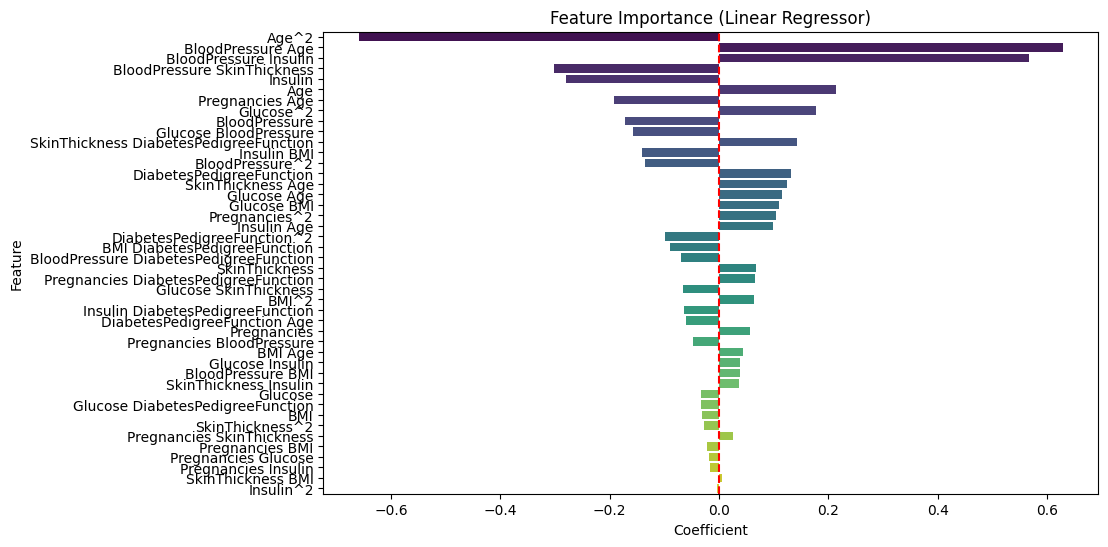

In [119]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (Linear Regressor)')
plt.show()

### 5.2 Linear Regression (GD)


C:\Users\MegaComp\AppData\Local\Temp\ipykernel_7920\1425956437.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


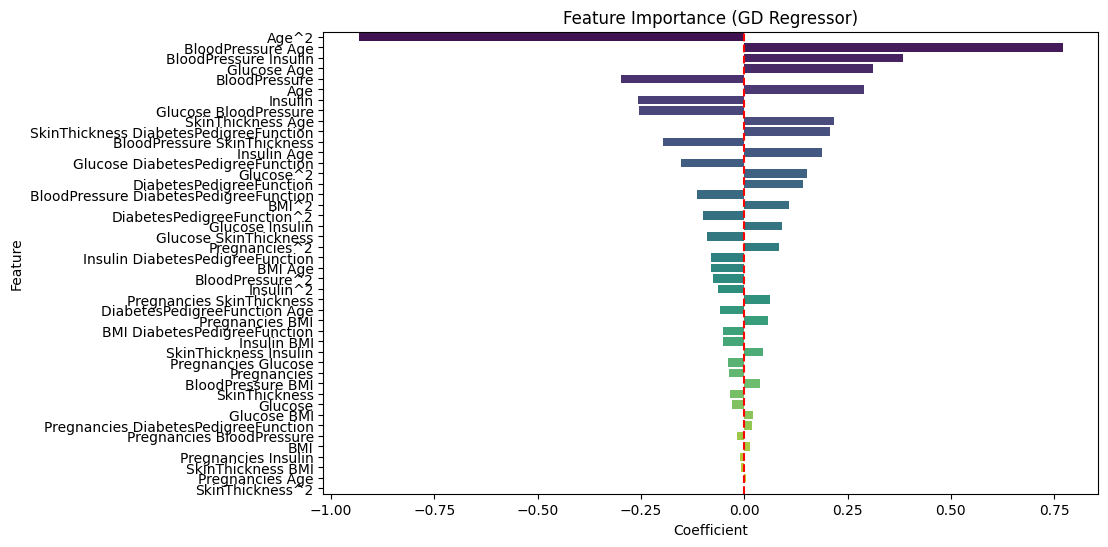

In [120]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_gd.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (GD Regressor)')
plt.show()

### 5.3 Linear Regression (SGD)


C:\Users\MegaComp\AppData\Local\Temp\ipykernel_7920\1165310945.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


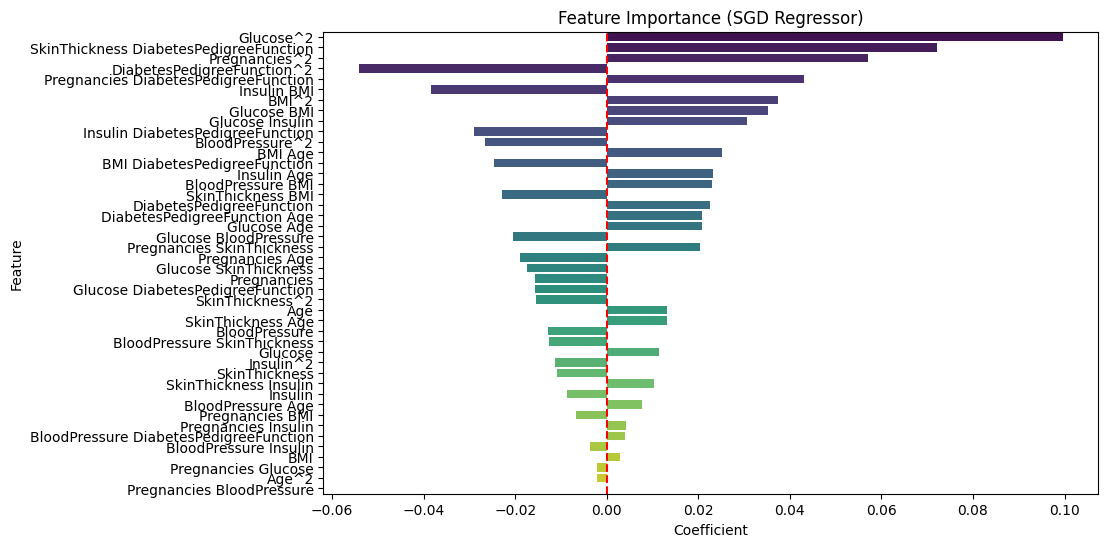

In [121]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_sgd.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (SGD Regressor)')
plt.show()

### 5.4 Linear Regression (Rigde)


C:\Users\MegaComp\AppData\Local\Temp\ipykernel_7920\647660009.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


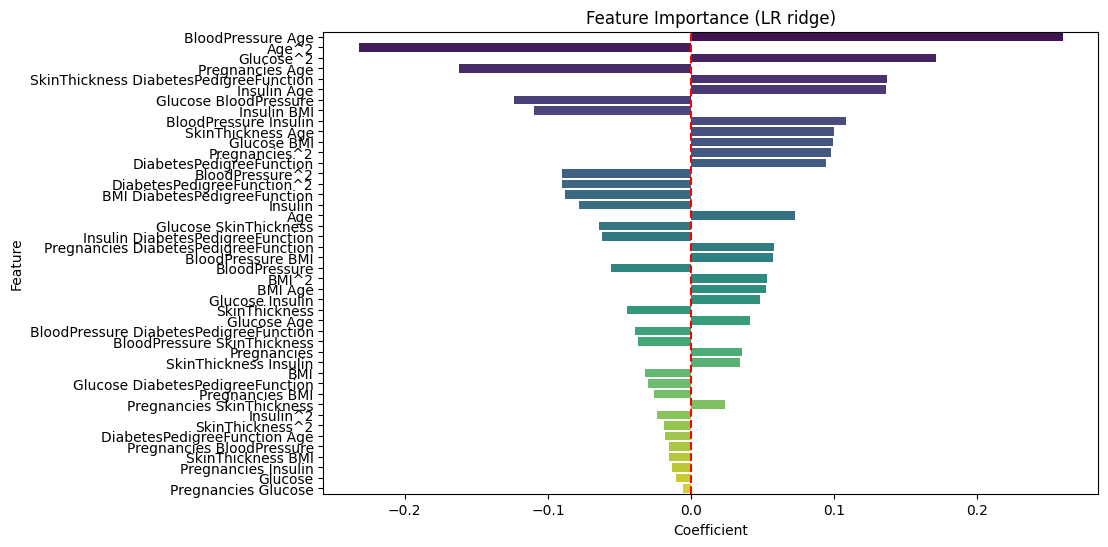

In [122]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_ridge.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (LR ridge)')
plt.show()

### 5.5 Linear Regression (Lasso)


C:\Users\MegaComp\AppData\Local\Temp\ipykernel_7920\4184585031.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


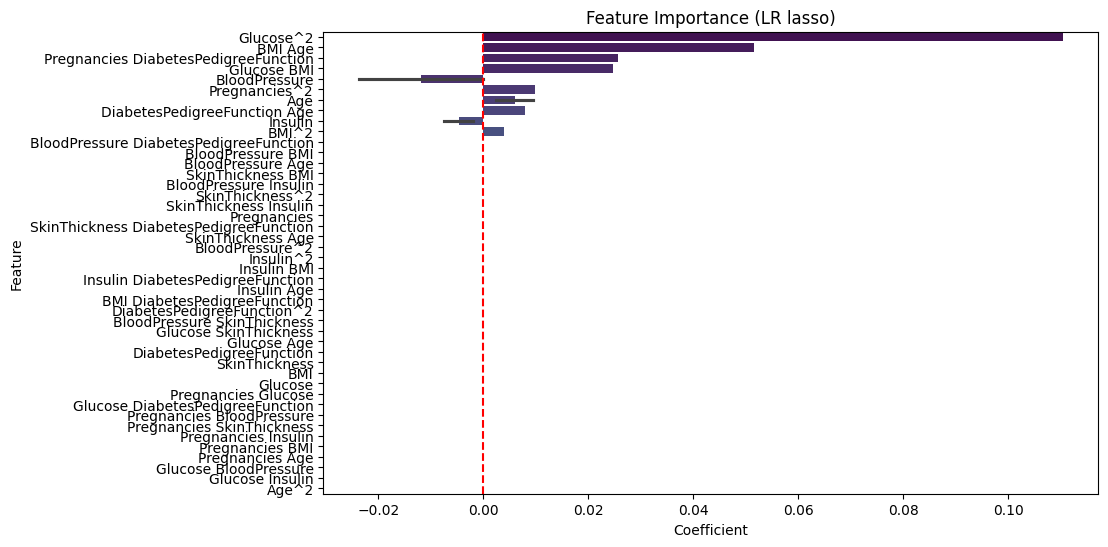

In [123]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_lasso.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (LR lasso)')
plt.show()

### 5.6 Linear Regression (ElasticNet)


C:\Users\MegaComp\AppData\Local\Temp\ipykernel_7920\319265374.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


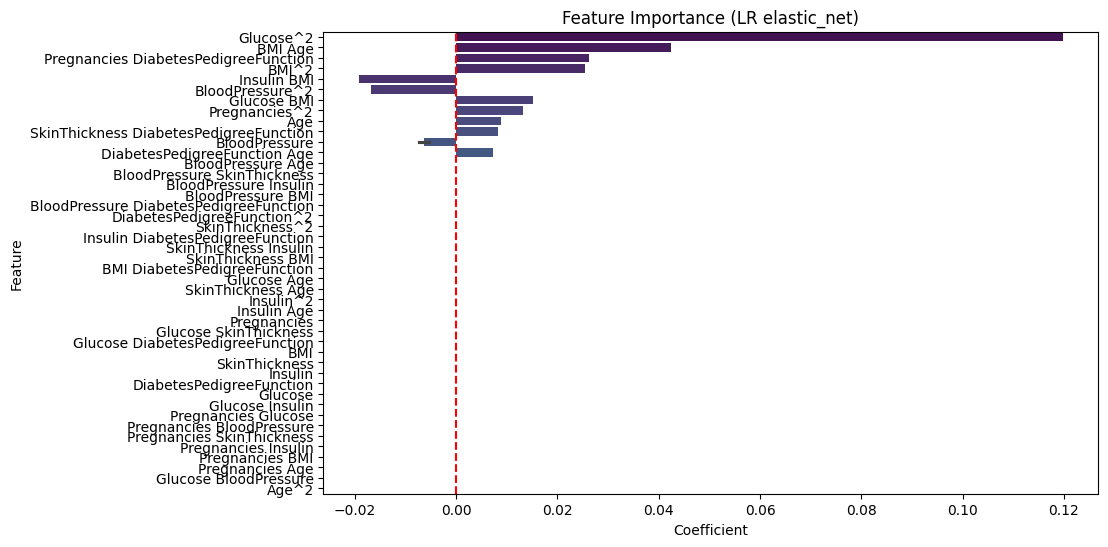

In [124]:
importance = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': lr_enet.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=importance,
    palette='viridis'
)
plt.axvline(0, color='red', linestyle='--')
plt.title('Feature Importance (LR elastic_net)')
plt.show()

### 5.7 Random Forest


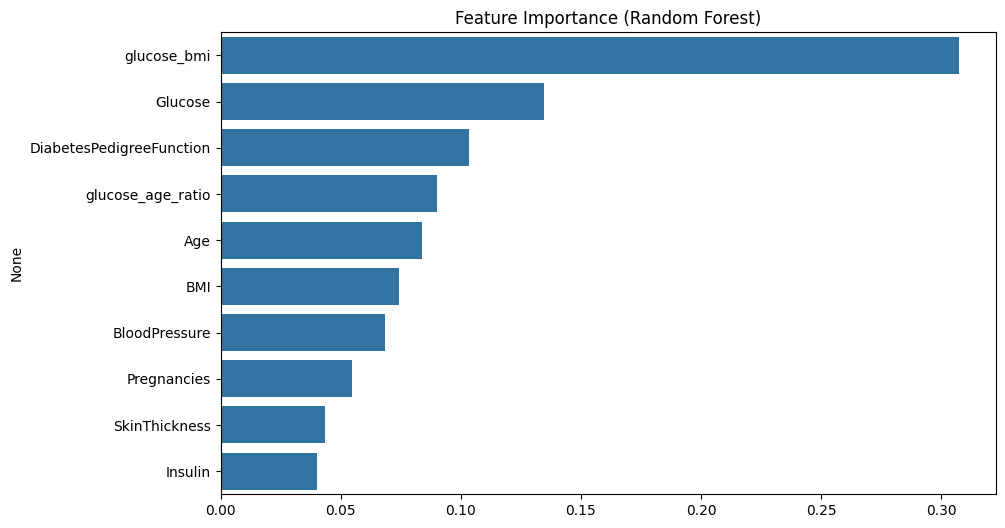

In [125]:
feature_importances = pd.Series(rf.feature_importances_, index=X_forest.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importance (Random Forest)")
plt.show()

### 5.6 XGBoost

<Figure size 1000x600 with 0 Axes>

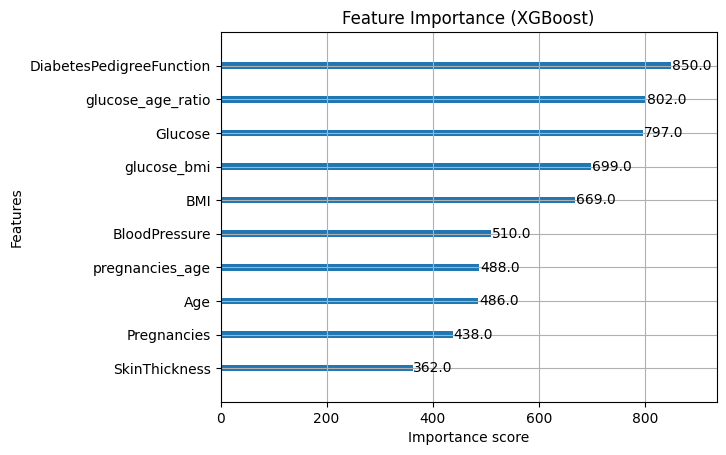

In [126]:
plt.figure(figsize=(10,6))
xgboost.plot_importance(xgb, importance_type='weight', max_num_features=10)
plt.title("Feature Importance (XGBoost)")
plt.show()

## 8. Написание своих реализаций (классы)

Напишите свои классы реализации:

- LR
- LR + GD
- LR + SGD
- *Random Forest (не обязательно)
- *Gradient Boosting Regressor (не обязательно)

## 9. Итоги

Что сделать?

1. Сгрупировать все метрики, и выяснить, какой методо сработал лучше всего и почему?
2. Ответить на вопросы:

    1. Что такое регрессия и чем она отличается от классификации?
    2. Какова целевая переменная в задаче регрессии?
    3. Зачем нужно масштабирование признаков перед обучением линейной регрессии?
    4. Что означает коэффициент признака в линейной регрессии?
    5. Что такое MSE, RMSE, MAE и R², и чем они отличаются?
    6. В чем разница между Ridge и Lasso регуляризацией?
    7. Почему деревья решений и Random Forest не требуют стандартизации признаков?
    8. Что такое мультиколлинеарность и почему она мешает линейной регрессии?
    9. Как можно уменьшить влияние выбросов на линейную регрессию?
    10. Какие гиперпараметры наиболее важны для Random Forest Regressor?
    11. Какие гиперпараметры наиболее важны для XGBoost в задаче регрессии?
    12. Что значит глубина дерева (max\_depth) и как она влияет на модель?
    13. Зачем нужен `learning_rate` в градиентном бустинге?
    14. Как можно оценить важность признаков (feature importance) в линейной регрессии, случайном лесу и XGBoost?
    15. Почему XGBoost часто работает лучше, чем Random Forest, на структурированных данных?
    16. Что такое переобучение и как его можно выявить на графике обучения?
    17. Как работает метод ансамблирования в Random Forest (bagging)?
    18. В чем отличие бустинга от бэггинга?
    19. Какие способы feature engineering можно применить к винному датасету (Wine Quality)?
    20. Как использовать кросс-валидацию для подбора гиперпараметров моделей регрессии?


#### 9.1. Группировка метрик

In [62]:
# code here

#### 9.2. Ответы на вопросы

Вопрос:

Ответ: